In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from utils.kitti_mot import kitti_mot, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes

# 1. 加载kitti_mot格式数据

# 1. 加载kitti_mot格式数据

In [2]:
# 1. 加载kitti_mot格式数据
dataset = kitti_mot('data/kitti-mot-sample', '0006')

data/kitti-mot-sample 0006


In [3]:
# 2. 根据图像索引获取相关信息
img_idx = 0
objects = dataset.get_label_objects(img_idx) # 障碍物标注
pc_velo = dataset.get_lidar(img_idx)   # 点云
calib = dataset.get_calibration()  # 标定参数
img = dataset.get_image(img_idx) # 左眼图像
img_height, img_width, _ = img.shape

data/kitti-mot-sample/velodyne/0006/000000.bin


In [4]:
# 3. 图像中可视化2d和3d框
img_bbox2d, img_bbox3d = show_image_with_boxes(img, objects, calib, save_dir='output') # cv2的色彩通道为BGR
img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

In [5]:
# 4. 将点云映射到图像上
img_lidar = show_lidar_on_image(pc_velo[:, :3], img, calib, img_width, img_height, save_dir='output')
img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

In [6]:
# 5. 点云bev可视化（带框）
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib, save_dir='output')
img_bev = cv2.cvtColor(img_bev, cv2.COLOR_BGR2RGB)

top_image: (450, 300, 3)


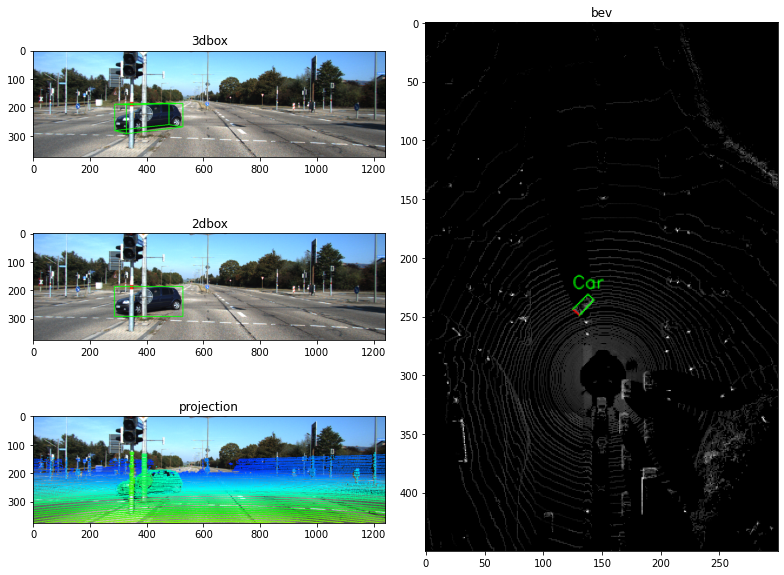

In [7]:
# 5. 利用matplotlib进行可视化
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 8))
axes[0, 0].imshow(img_bbox3d)
axes[0, 0].set_title('3dbox')
axes[1, 0].imshow(img_bbox2d)
axes[1, 0].set_title('2dbox')
axes[2, 0].imshow(img_lidar)
axes[2, 0].set_title('projection')
axes[0, 1].remove()
axes[1, 1].remove()
axes[2, 1].remove()
right_ax = fig.add_subplot(1, 2, 2)
right_ax.imshow(img_bev)
right_ax.set_title('bev')
plt.tight_layout() # 调整子图之间的间距
plt.savefig('output/all.png')
plt.show()
